In [ ]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================

import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# ==============================
# 2. LOAD DATA
# ==============================

df = pd.read_csv(r"Sample - Superstore.csv", encoding='latin1')

print("Initial Shape:", df.shape)
print("="*50)
print(df.head())
print("="*50)
df.info()

# ==============================
# 3. STANDARDIZE COLUMN NAMES
# ==============================

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print("\nColumns after cleaning:\n", df.columns)

# ==============================
# 4. CHECK & REMOVE DUPLICATES
# ==============================

print("\nDuplicate Rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Shape after removing duplicates:", df.shape)

# ==============================
# 5. CLEAN TEXT COLUMNS
# ==============================

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip()

# ==============================
# 6. HANDLE DATE COLUMNS
# ==============================

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# ==============================
# 7. HANDLE MISSING VALUES
# ==============================

print("\nMissing Values:\n", df.isnull().sum())

# fill postal code if missing
if 'postal_code' in df.columns:
    df['postal_code'].fillna(df['postal_code'].mode()[0], inplace=True)

# ==============================
# 8. FEATURE ENGINEERING
# ==============================

# Delivery time
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days

# Profit ratio KPI
df['profit_ratio'] = df['profit'] / df['sales']

# Extract year & month for trend analysis
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month_name()

# ==============================
# 9. DATA VALIDATION CHECKS
# ==============================

print("\nNegative Profit Rows:", (df['profit'] < 0).sum())
print("Zero Sales Rows:", (df['sales'] == 0).sum())
print("Max Delivery Days:", df['delivery_days'].max())

# ==============================
# 10. SUMMARY STATISTICS
# ==============================

print("\nSummary Statistics:\n")
print(df.describe())

# ==============================
# 11. BUSINESS ANALYSIS OUTPUTS
# ==============================

# Top selling categories
top_categories = df.groupby('category')['sales'].sum().sort_values(ascending=False)
print("\nTop Categories by Sales:\n", top_categories)

# Top states by sales
top_states = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 States by Sales:\n", top_states)

# Profit by sub-category
profit_subcat = df.groupby('sub-category')['profit'].sum().sort_values()
print("\nLoss Making Sub-Categories:\n", profit_subcat.head())

# Monthly sales trend
monthly_sales = df.groupby(['order_year','order_month'])['sales'].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)

# Discount impact on profit
discount_profit = df.groupby('discount')['profit'].mean()
print("\nDiscount vs Avg Profit:\n", discount_profit)

# ==============================
# 12. SAVE CLEANED DATA
# ==============================

df.to_excel("superstore_cleaned.xlsx", index=False)

print("\n✅ CLEANED FILE SAVED: superstore_cleaned.xlsx")


Initial Shape: (9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City       State  Postal Code Region       Product ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky        42420  South  FUR-BO-10001798   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky        42420  South  FUR-CH-10000454   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles  California        90036   West  OFF-LA-10000240   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida        33311  South  FUR-TA-10000577   
4       5  US-2015-10896

C:\Users\likit\AppData\Local\Temp\ipykernel_16288\922134751.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['postal_code'].fillna(df['postal_code'].mode()[0], inplace=True)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# load cleaned data
df = pd.read_excel("superstore_cleaned.xlsx")

print(df.shape)
df.head()


(9994, 25)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,delivery_days,profit_ratio,order_year,order_month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.1600,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.3000,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.4700,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,-0.4000,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.1125,2015,October


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

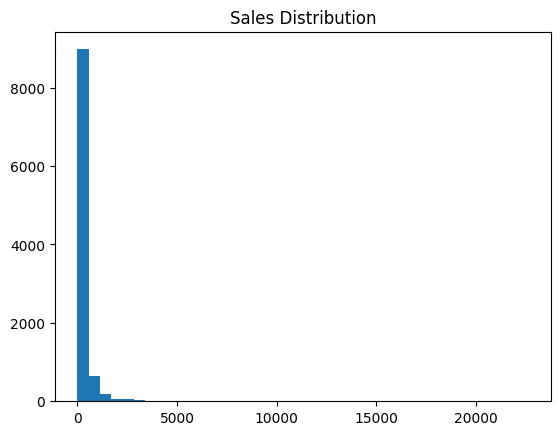

In [5]:
plt.figure()
plt.hist(df['sales'], bins=40)
plt.title("Sales Distribution")
plt.show()


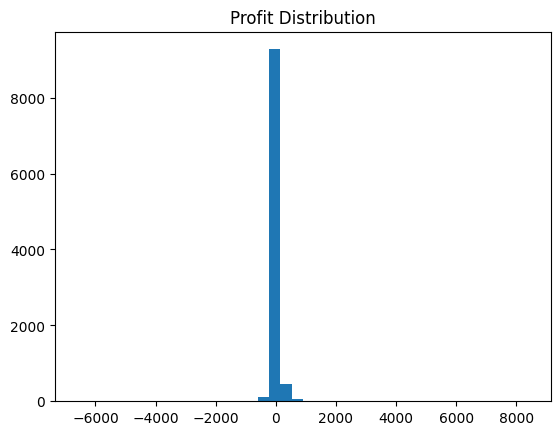

In [6]:
plt.figure()
plt.hist(df['profit'], bins=40)
plt.title("Profit Distribution")
plt.show()


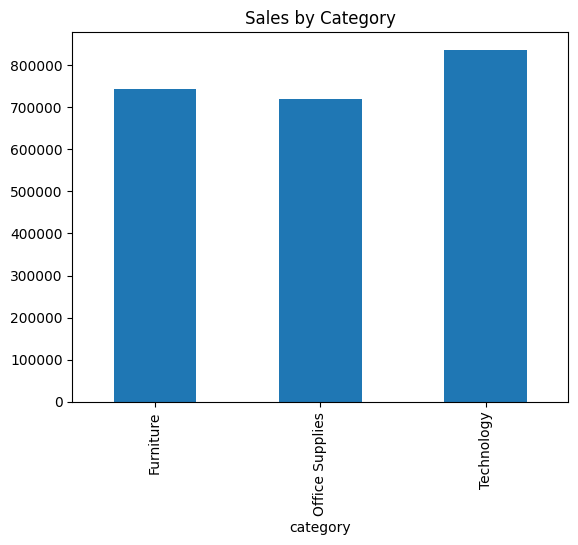

category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: sales, dtype: float64


In [7]:
category_sales = df.groupby('category')['sales'].sum()

plt.figure()
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.show()

print(category_sales)


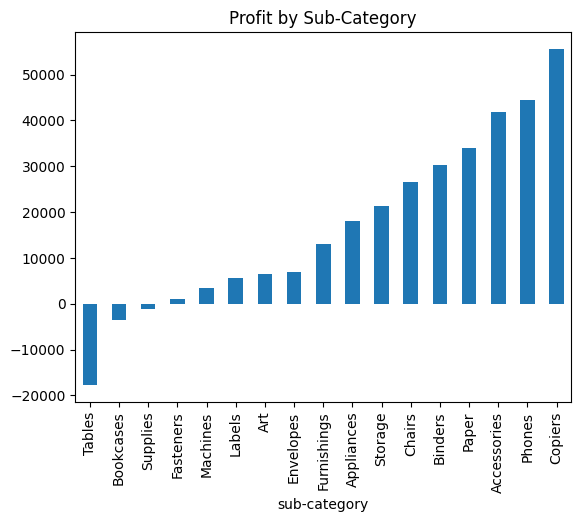

sub-category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: profit, dtype: float64


In [8]:
sub_profit = df.groupby('sub-category')['profit'].sum().sort_values()

plt.figure()
sub_profit.plot(kind='bar')
plt.title("Profit by Sub-Category")
plt.show()

print(sub_profit.head())


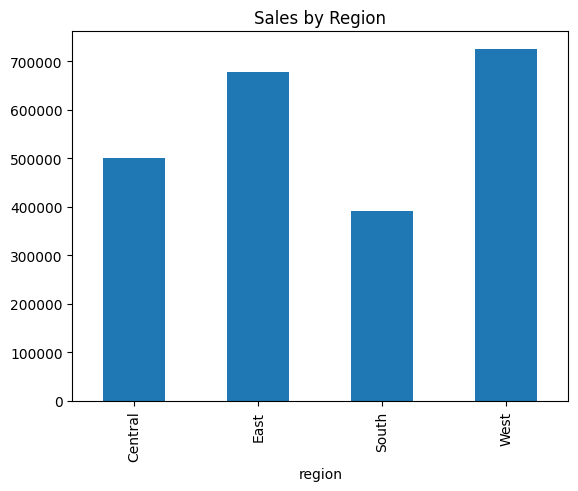

region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: sales, dtype: float64


In [9]:
region_sales = df.groupby('region')['sales'].sum()

plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.show()

print(region_sales)


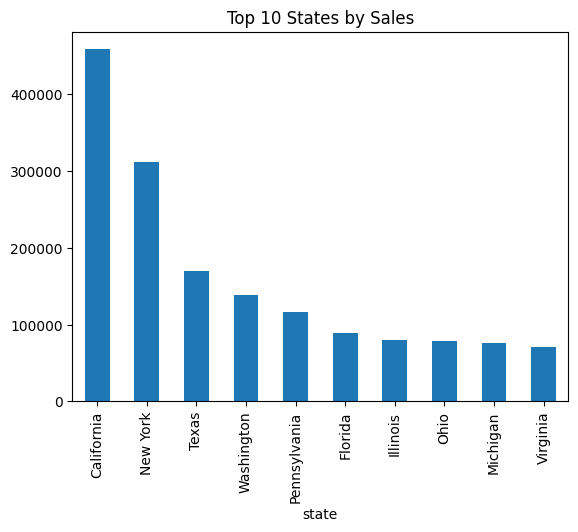

state
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: sales, dtype: float64


In [10]:
top_states = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_states.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.show()

print(top_states)


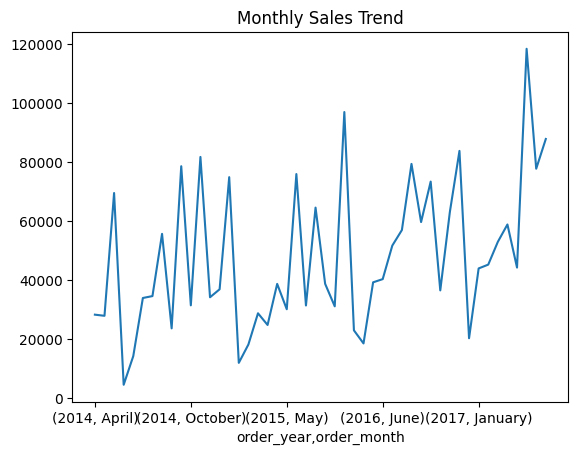

In [11]:
monthly_sales = df.groupby(['order_year','order_month'])['sales'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


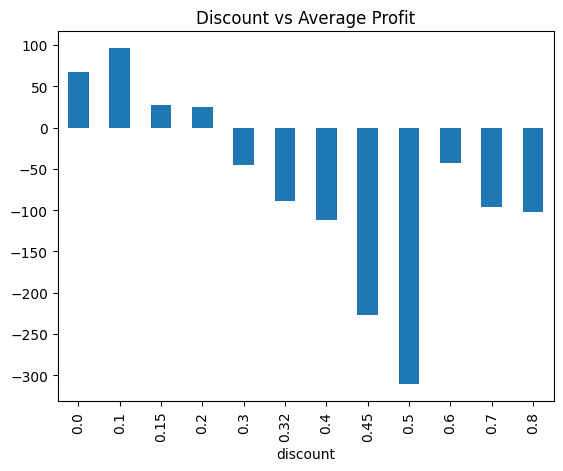

discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: profit, dtype: float64


In [12]:
discount_profit = df.groupby('discount')['profit'].mean()

plt.figure()
discount_profit.plot(kind='bar')
plt.title("Discount vs Average Profit")
plt.show()

print(discount_profit)


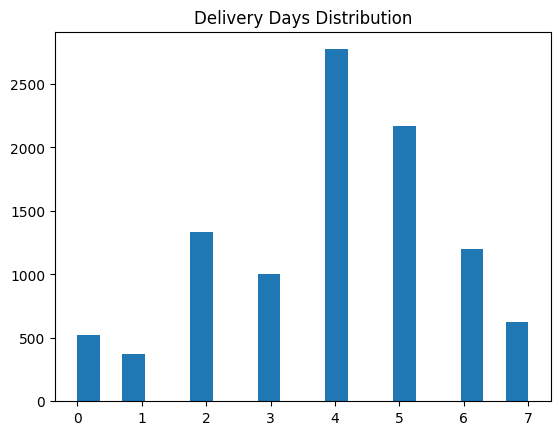

Average Delivery Time: 3.958174904942966


In [13]:
plt.figure()
plt.hist(df['delivery_days'], bins=20)
plt.title("Delivery Days Distribution")
plt.show()

print("Average Delivery Time:", df['delivery_days'].mean())


In [14]:
loss_orders = df[df['profit'] < 0]

print("Total Loss Orders:", len(loss_orders))
print("Total Loss Amount:", loss_orders['profit'].sum())

loss_by_category = loss_orders.groupby('category')['profit'].sum()
print(loss_by_category)


Total Loss Orders: 1871
Total Loss Amount: -156131.2857
category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: profit, dtype: float64


In [15]:
df.to_csv(r"D:\SindhuSree\Desktop\Data Science\Future Interns\Task_01\superstore_cleaned.csv", index=False)
